<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
          text-align: center; font-size:250%;border-radius:20px 80px;">Heart Attack Prediction</p>

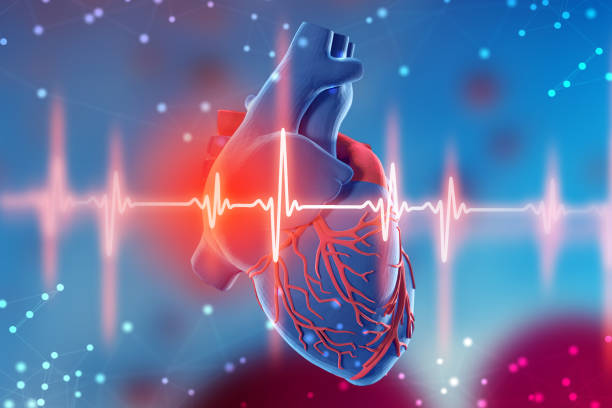

<b>🙋‍♂️🙋‍♀️ Hi all !!! we are going to work with heart attack classifiction dataset,If you like this notebook then plz consider a upvote for me and if don't plz drop your advise or comment so that i improve my skill 😎😎

<a id=""></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:250%;border-radius:20px 80px;">📋 TABLE OF CONTENTS</p>

* [1. Importing Libraries](#1)
    
* [2. Meta information of dataframe](#2)
    
* [3.Missing values.](#3)

* [3.1 Duplicated rows.](#3.1)
    
* [4.Statistical information of Dataframe](#4) 

* [5.Visualize correlation of independent features and check multicolinarity problems](#5)
    
* [6. EDA & Visualization](#6)

    * [6.1. Numerical EDA](#6.1)
    
    * [6.2. Terget EDA](#6.2)
    
    * [6.3. Categorical EDA](#6.3)
        
    
* [7. 🏍Feature Engineering](#7)

    * [7.1.🏍Normalized skewed col](#7.1)
    
    * [7.2.🏍Train test split](#7.2)
       
    * [7.3. Scaling Features](#7.3)
       
    

* [8. Create & Train Model](#8)

* [9. Models Score](#9)

* [10. Visualize Models Score](#10)

* [11. Plot Confusion Matrix for best 2 models](#11)




<a id=""></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:250%;border-radius:20px 80px;"> 🚢Data Story</p>

There are 13 attributes: 
1. Age: Age (in years) .
2. Sex: gender (1 = male; 0 = female).
3.ChestPain: Chest Pain type -- 1: typical angina (all criteria present) -- 2: atypical angina (two of three criteria satisfied) -- 3: non-anginal pain (less than one criteria satisfied) -- 4: asymptomatic (none of the criteria are satisfied).

4. Restbps: Resting Blood pressure (in mmHg, upon admission to the hospital). 
5. Chol: serum cholesterol in mg/dL. 
6. Fbs: fasting blood sugar > 120 mg/dL (likely to be diabetic) 1 = true; 0 = false .
7. RestECG: Resting electrocardiogram results -- Value 0: normal -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria .
8. MaxHR: Greatest number of beats per minute your heart can possibly reach during all-out strenuous exercise.
9.Exang: exercise induced angina (1 = yes; 0 = no).
10. Oldpeak: ST depression induced by exercise relative to rest (in mm, achieved by subtracting the lowest ST segment points during exercise and rest).

11. Slope: the slope of the peak exercise ST segment, ST-T abnormalities are considered to be a crucial indicator for identifying presence of ischaemia -- Value 1: upsloping -- Value 2: flat -- Value 3: downsloping .
12.Ca: number of major vessels (0-3) colored by fluoroscopy. Major cardial vessels are as goes: aorta, superior vena cava, inferior vena cava, pulmonary artery (oxygen-poor blood --> lungs), pulmonary veins (oxygen-rich blood --> heart), and coronary arteries (supplies blood to heart tissue).
13. AHD: 0 = normal; 1 = fixed defect (heart tissue can't absorb thallium both under stress and in rest); 2 = reversible defect (heart tissue is unable to absorb thallium only under the exercise portion of the test)
14.Target: 0 = no disease, 1 = disease.


Reference :   https://www.kaggle.com/pritsheta/heart-attack

<a id="1"></a>
<div class="list-group" id="1" role="tablist">
    
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:250%;border-radius:20px 80px;">🎰 Importing Libraries</p>

In [1]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,classification_report,plot_confusion_matrix,confusion_matrix
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler,PowerTransformer,FunctionTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from xgboost.sklearn import XGBClassifier
import warnings
warnings.filterwarnings("ignore")


import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from plotly import tools


%matplotlib inline 


In [2]:
#Load the dataset and check the data head.
df=pd.read_csv("Heart Attack Data Set.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<a id="2"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">📝 Meta information 
    about Dataframe</p>

In [3]:
#check the rows and columns number.
print(f"number of rows:--> {df.shape[0]} and number of columns:--> {df.shape[1]}")

number of rows:--> 303 and number of columns:--> 14


In [4]:
#chack the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<a id="3"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">🛒Missing values </p>

In [5]:
#check for missing values 
def checking_m(df):
    null_v = df.isnull().sum().sort_values(ascending=False)
    null_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    null_v = pd.concat([null_v, null_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return null_v

checking_m(df)

,Missing_Number,Missing_Percent
age,0,0.0
sex,0,0.0
cp,0,0.0
trestbps,0,0.0
chol,0,0.0
fbs,0,0.0
restecg,0,0.0
thalach,0,0.0
exang,0,0.0
oldpeak,0,0.0


<b>No missing or Nan values found , great 😁

<a id="3.1"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">🤼‍♀️Duplicated rows </p>

In [6]:
#check for dublicated rows
print("Numbers of duplicated rows :",df.duplicated().sum())

Numbers of duplicated rows : 1


<b> Oh no , 1 duplicated rows found 🥵,let's remove it 😙

In [7]:
#dropping the duplicated rows 
df=df.drop_duplicates(keep="first")
print("After removing,now number of duplicated rows are:",df.duplicated().sum())

After removing,now number of duplicated rows are: 0


<a id="4"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">📈 Statistical information of Dataframe </p>

In [8]:
#check data description
df.describe().T.style.bar(subset=['mean'], color='#205ff2').background_gradient(subset=['std'], cmap='mako').background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
age,302.000000,54.420530,9.047970,29.000000,48.000000,55.500000,61.000000,77.000000
sex,302.000000,0.682119,0.466426,0.000000,0.000000,1.000000,1.000000,1.000000
cp,302.000000,0.963576,1.032044,0.000000,0.000000,1.000000,2.000000,3.000000
trestbps,302.000000,131.602649,17.563394,94.000000,120.000000,130.000000,140.000000,200.000000
chol,302.000000,246.500000,51.753489,126.000000,211.000000,240.500000,274.750000,564.000000
fbs,302.000000,0.149007,0.356686,0.000000,0.000000,0.000000,0.000000,1.000000
restecg,302.000000,0.526490,0.526027,0.000000,0.000000,1.000000,1.000000,2.000000
thalach,302.000000,149.569536,22.903527,71.000000,133.250000,152.500000,166.000000,202.000000
exang,302.000000,0.327815,0.470196,0.000000,0.000000,0.000000,1.000000,1.000000
oldpeak,302.000000,1.043046,1.161452,0.000000,0.000000,0.800000,1.600000,6.200000


In [9]:
#check the correlation between terget and each of columns
df.corr()["target"]

age        -0.221476
sex        -0.283609
cp          0.432080
trestbps   -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
thalach     0.419955
exang      -0.435601
oldpeak    -0.429146
slope       0.343940
ca         -0.408992
thal       -0.343101
target      1.000000
Name: target, dtype: float64

<a id="5"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:150%;border-radius:20px 80px;">🎰 Visualize correlation of independent features and check multicolinarity problems </p>

<AxesSubplot:>

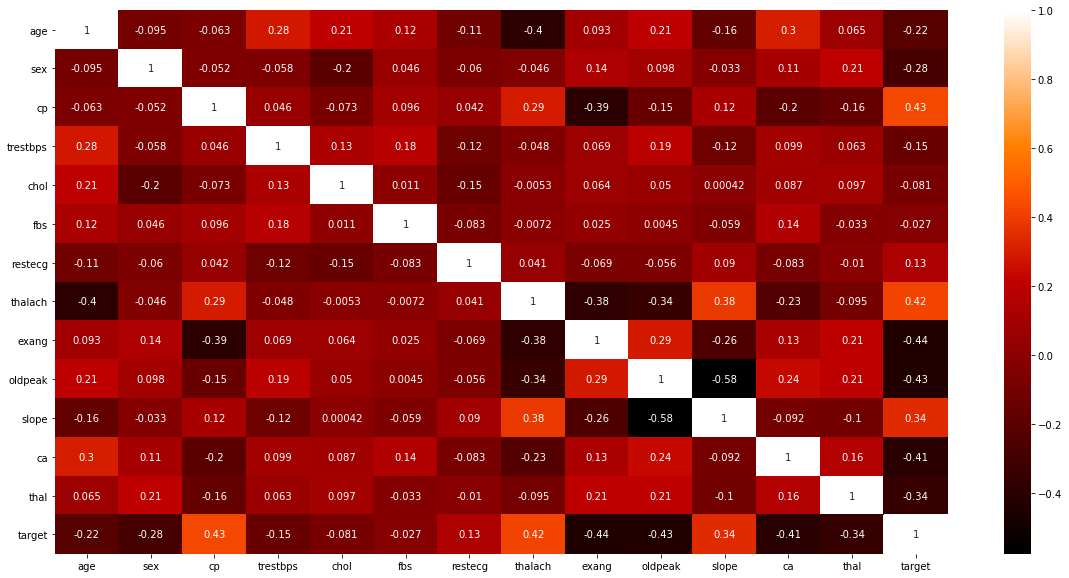

In [10]:
plt.figure(figsize=(20,10))

#plot heat map
sns.heatmap(df.corr(),annot=True,cmap="gist_heat",linecolor='black')

<b> No highly correlated independent features or no multicolinarity problems 😎

<a id="6"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:250%;border-radius:20px 80px;">🔥 EDA & Visualization</p>

<a id="6.1"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:250%;border-radius:20px 80px;">🔥 Numerical columns EDA</p>

In [11]:
numeric_col=["age","trestbps","chol","thalach","oldpeak"]

In [12]:
df[numeric_col].iplot(kind='histogram',subplots=True)

<b>
    
 1.All columns looks good but old peak column is right skewed.we fix it later !!! 

In [13]:
i=1
for col in numeric_col:
    fig = px.box(df, x=col, points="all",template="plotly_dark",width=500,height=250)

    fig.show()

<b> we got some columns contain outliers ,I think it's will be fine so we keep this outliers .

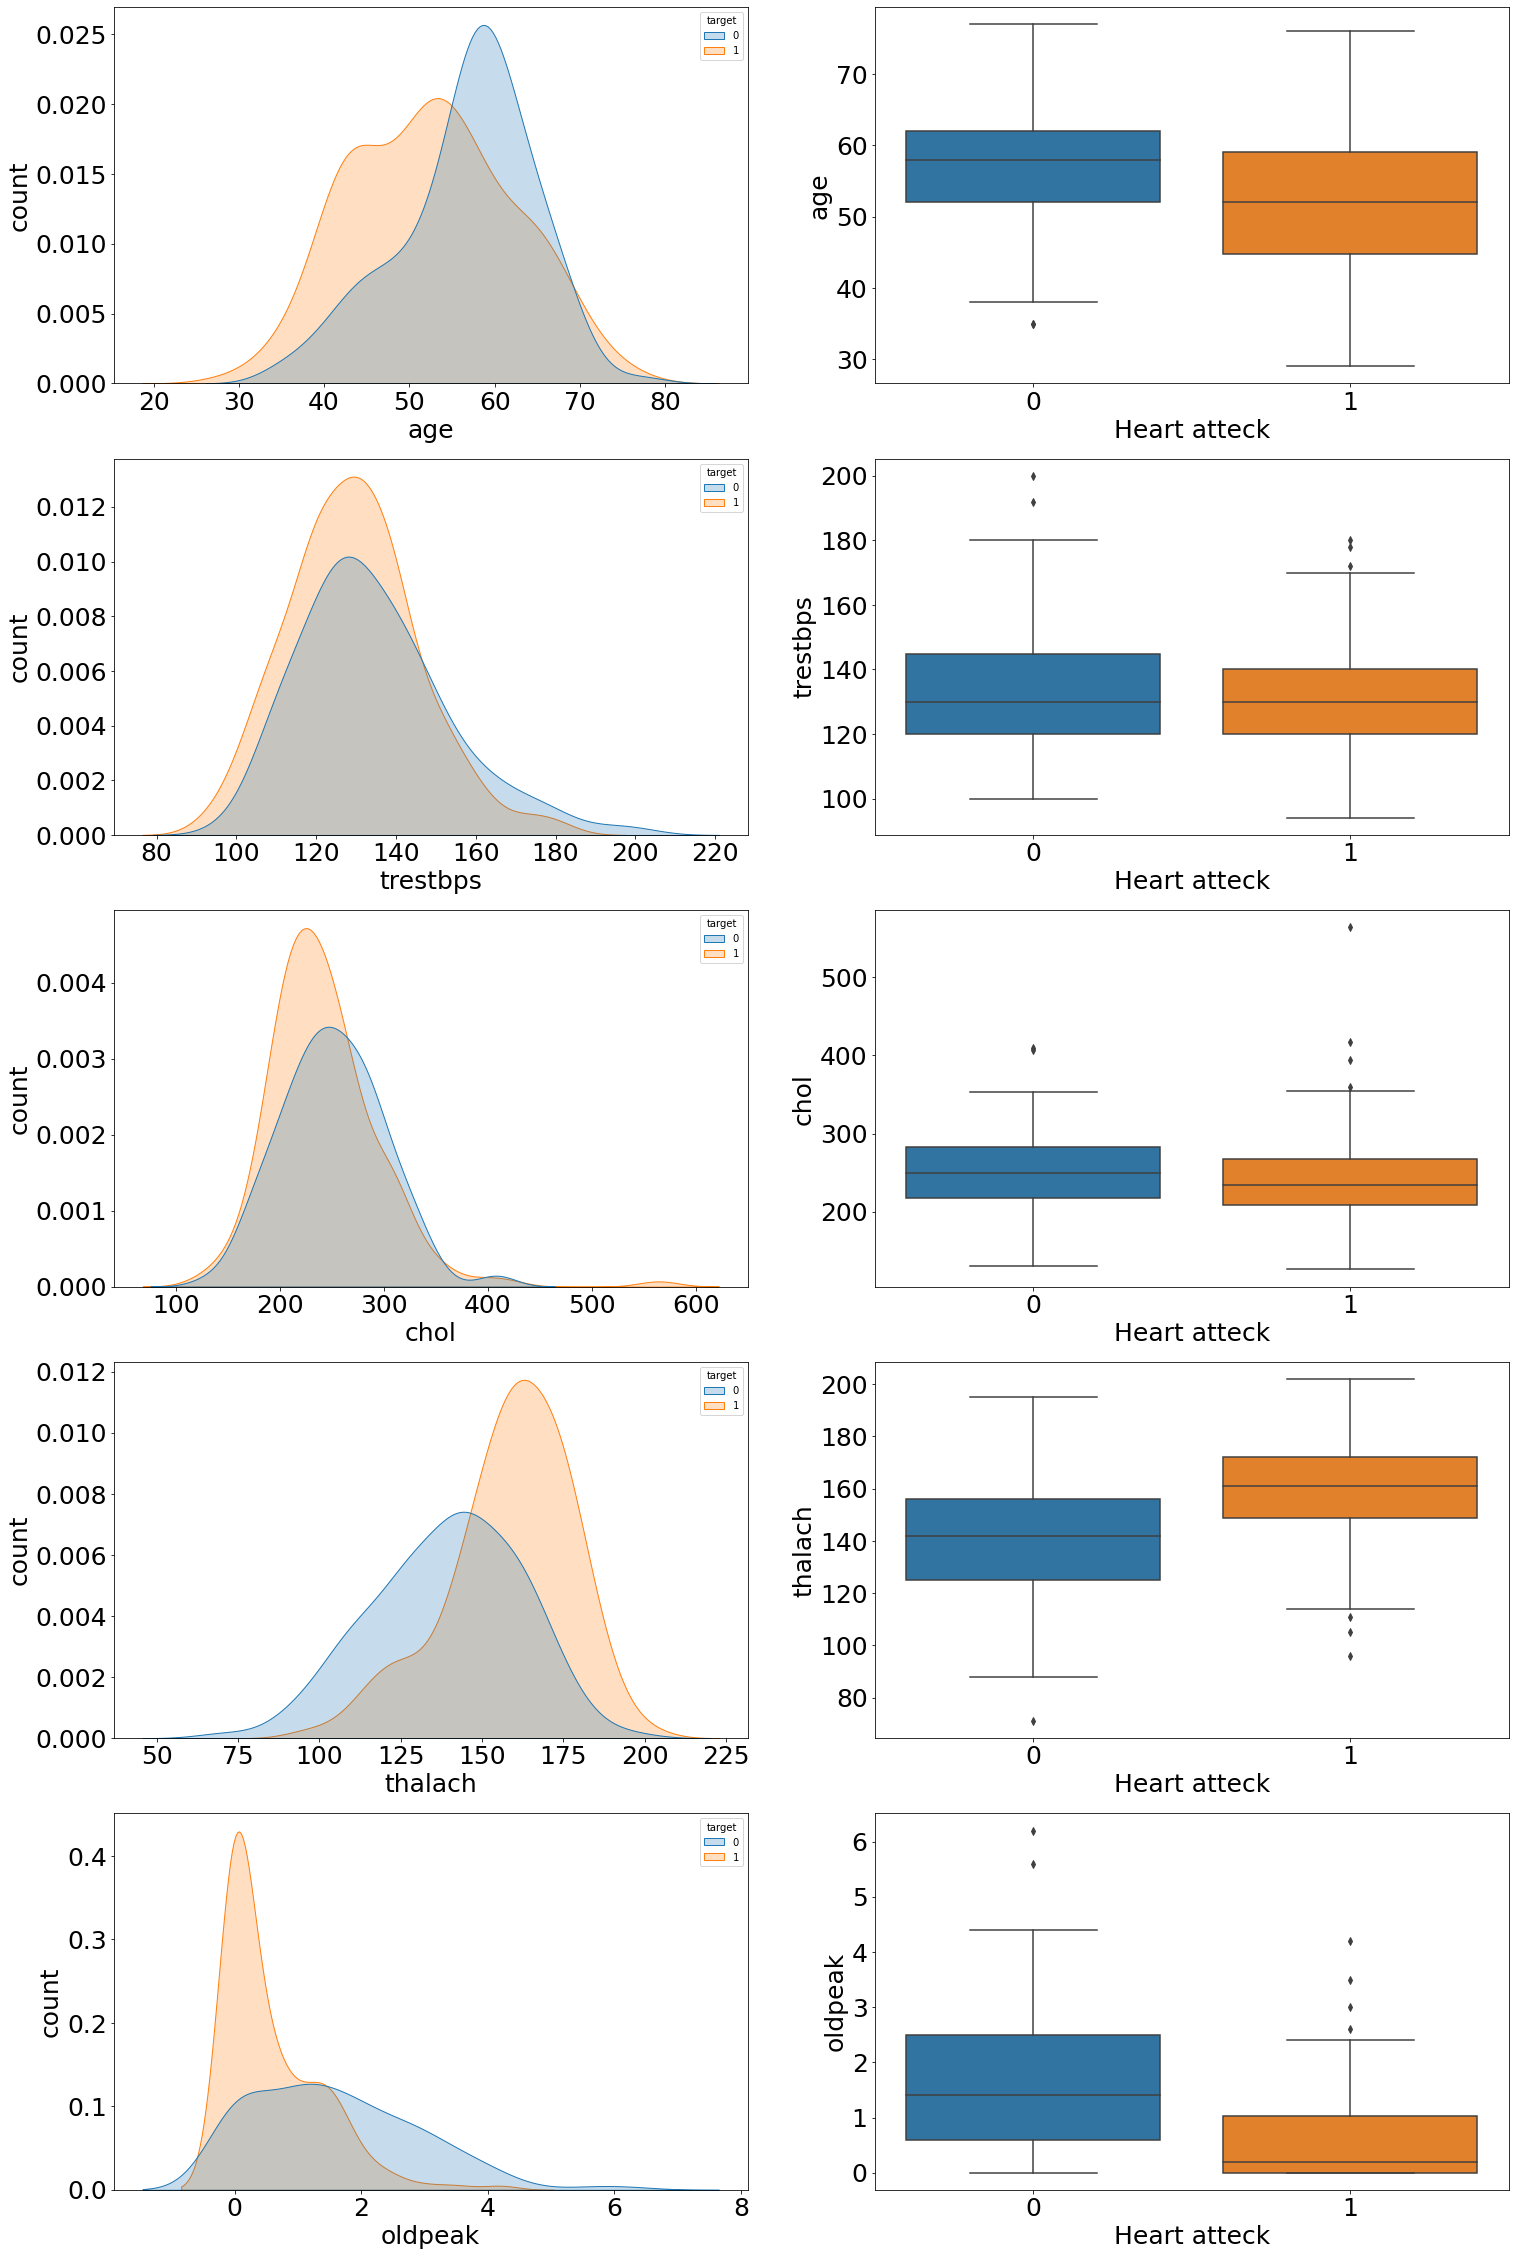

In [14]:
i=1
plt.figure(figsize=(25,90))
for col in numeric_col:
    plt.subplot(11,2,i)
    sns.kdeplot(data=df,hue="target",x=col,shade = "fill")
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("count",fontsize=25)
    i=i+1
    plt.subplot(11,2,i)
    sns.boxplot(df["target"],df[col])
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel("Heart atteck",fontsize=25)
    plt.ylabel(col,fontsize=25)
    i=i+1

plt.show()

<b> Analysis of numerical col:
    
    1.we got some skewed columns such as oldpeak.
    2.Higher chance of getting heart atteck if these staisfied:
        1.->45-55 years ages peoples.
        2.->120-140 (mmHG) resting bps .
        3.->200-300(mg/dL) cholesterol.
        4.->Higher the thalach values higher the heart attck chances.
        5.->lower the oldpeak vakues higher the heart attack chances.

<a id="6.2"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:250%;border-radius:20px 80px;">🔥 Target column EDA</p>

In [15]:
pd.DataFrame(df['target'].value_counts()).rename({"HeartAttack":"Counts"}, axis = 1).rename_axis("HeartAttack")

,target
HeartAttack,
1,164
0,138


In [16]:
fig = px.pie(df, names = "target",
             title = "<b>Counts in HeartAttack</b>",
             hole = 0.4, template = "plotly_dark",
            width=600,
            height=400)

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width = 2)))


fig.show()

<b>The classes of target columns is balanced or no imbalanced data or classes ,great🤩🤩

<a id="6.3"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">🔥 Encoded categorical columns EDA</p>

In [17]:
encoded_cat=["sex",'cp','fbs','restecg','exang','slope','ca','thal']

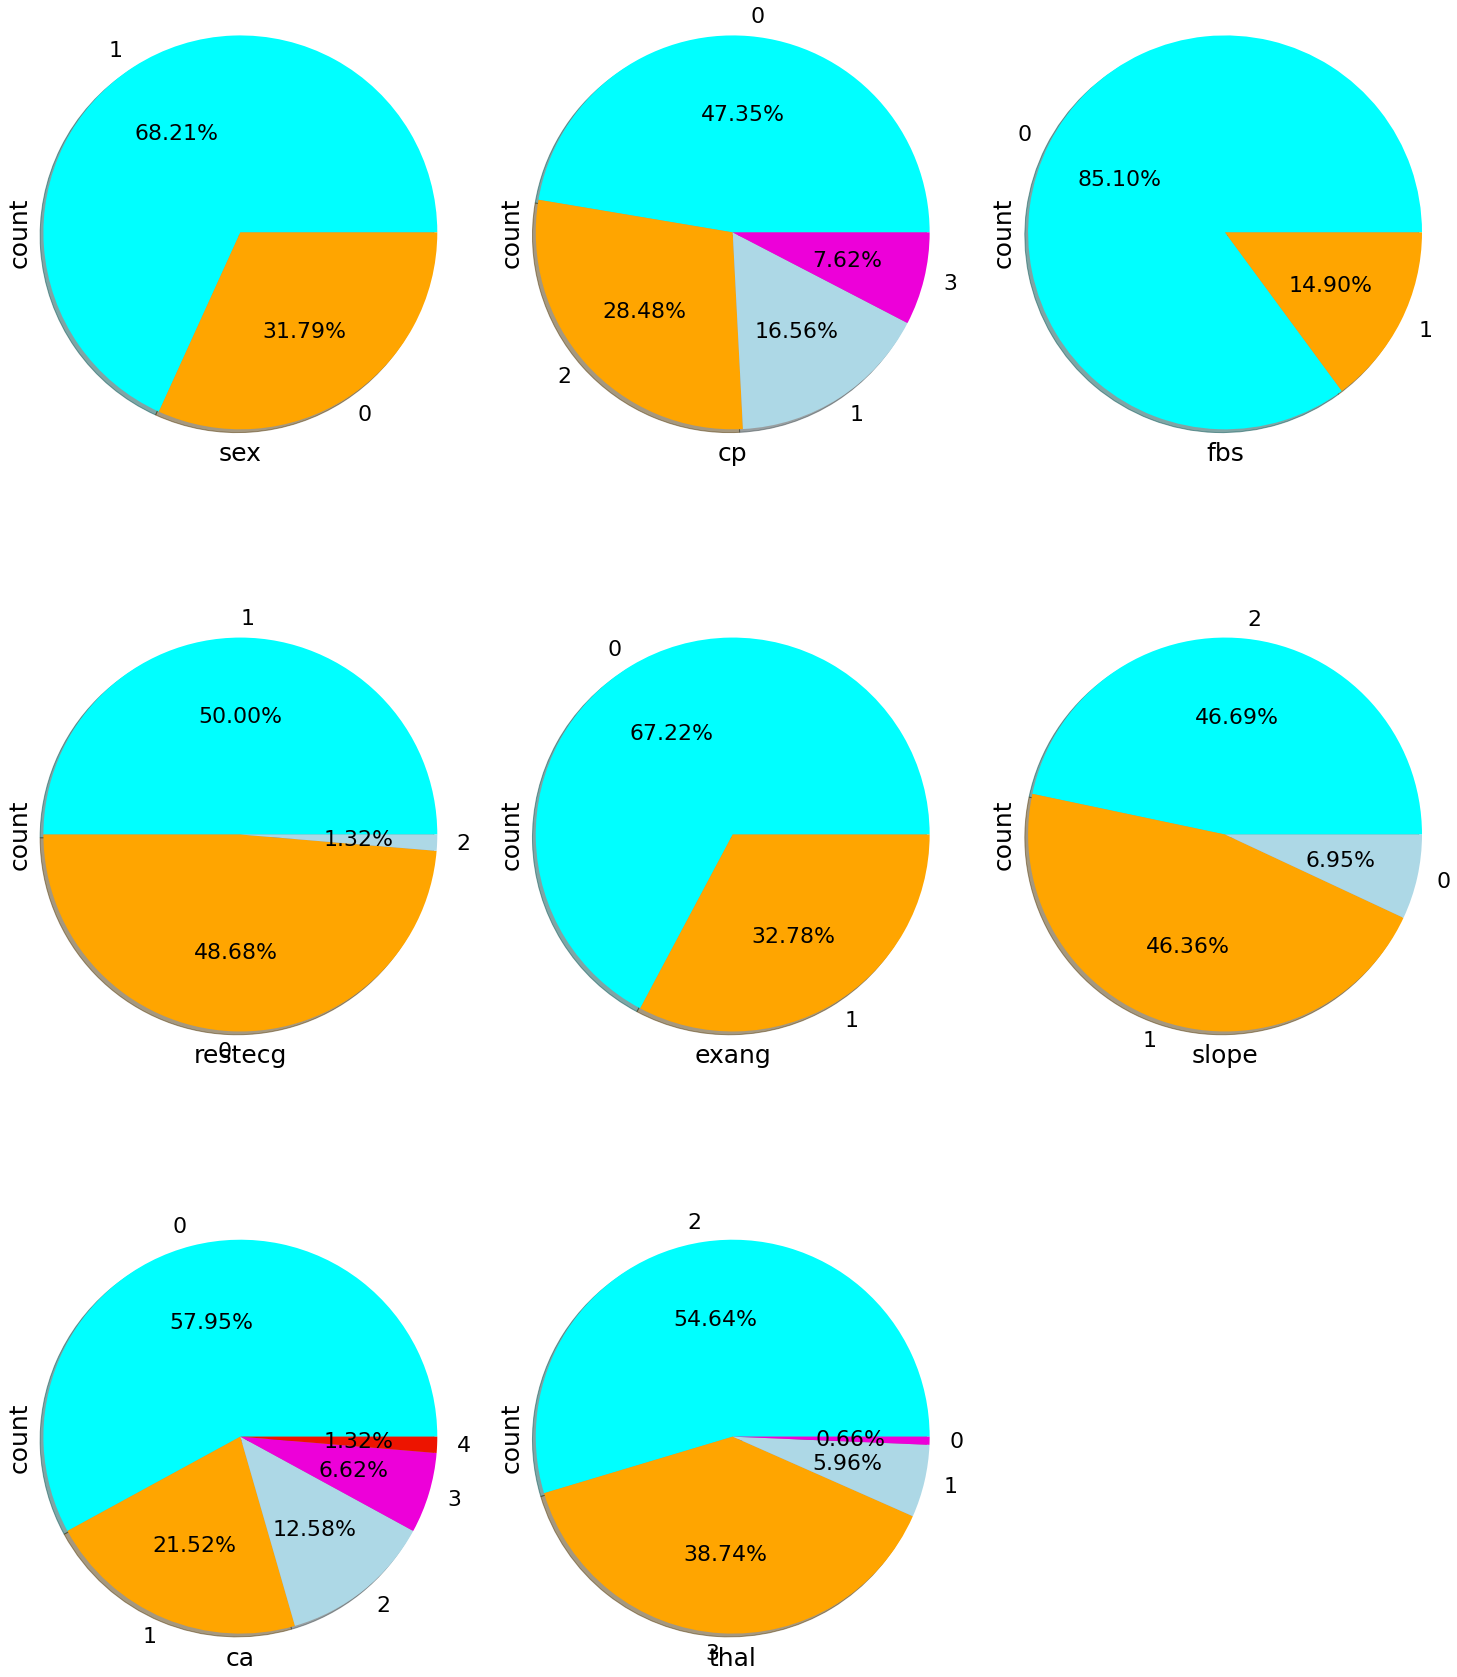

In [18]:
i=1 
colors=["#00FFFF","#FFA500","#ADD8E6","#ED00D9","#ED1400"]
textprops = {"fontsize":22}
plt.figure(figsize=(25,120))
for col in encoded_cat:
    plt.subplot(11,3,i)
    df[col].value_counts().plot(kind="pie",autopct="%.2f%%",colors=colors,textprops=textprops,shadow=True, radius = 1.2)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("count",fontsize=25)
    i=i+1
    

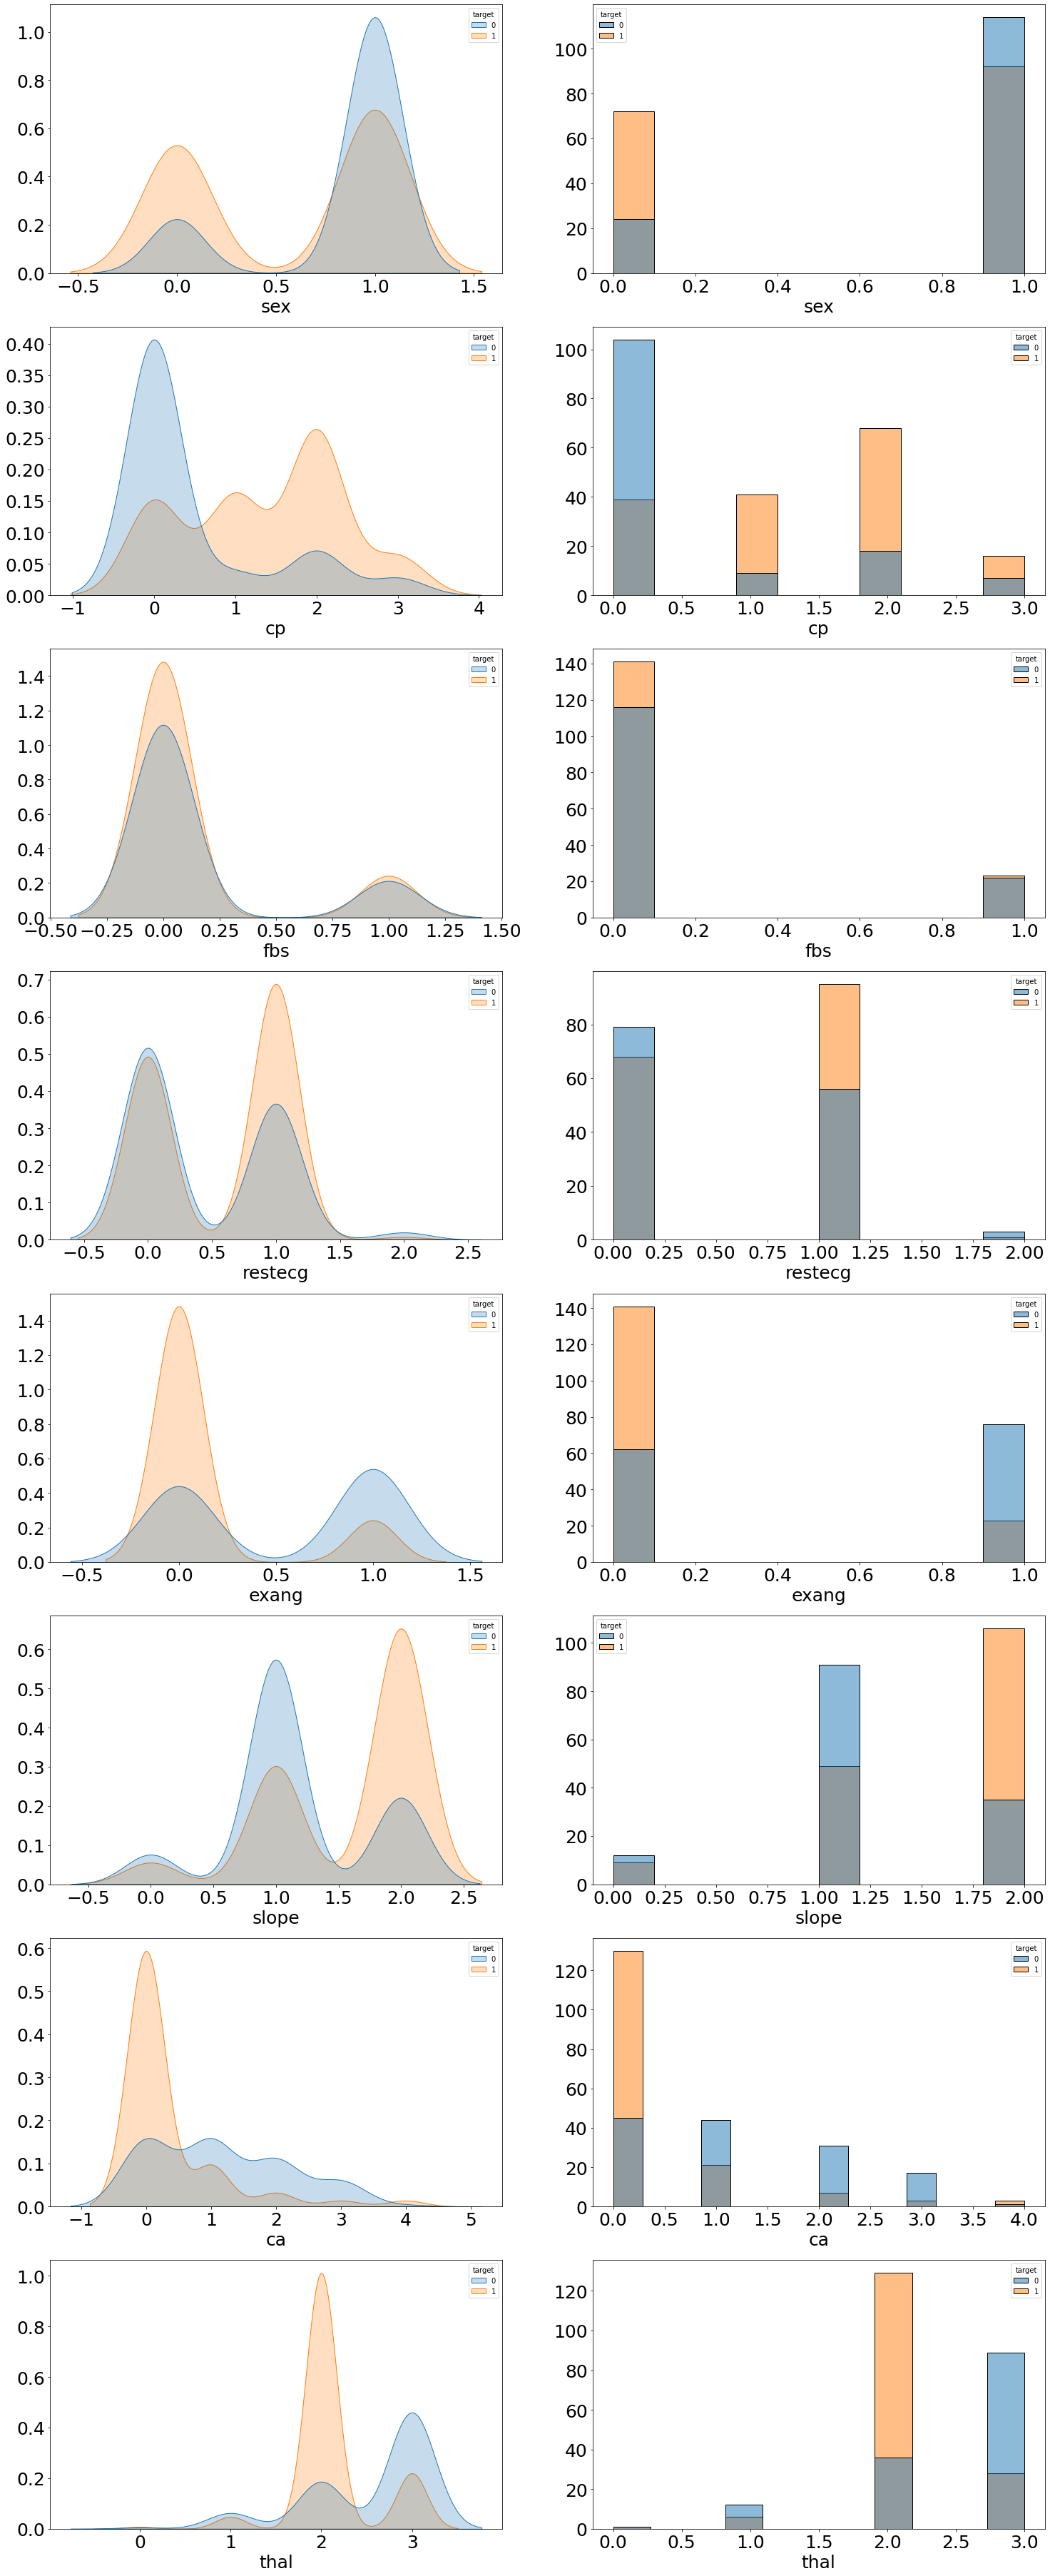

In [19]:
i=1
plt.figure(figsize=(25,90))
for col in encoded_cat:
    plt.subplot(11,2,i)
    sns.kdeplot(data=df,hue="target",x=col,shade = "fill")
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("",fontsize=25)
    i=i+1
    plt.subplot(11,2,i)
    sns.histplot(data=df,hue="target",x=col)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("",fontsize=25)
    i=i+1

plt.show()

<b>Analysis of encoded categorical columns:
    
   Higher chance of getting heart atteck if these staisfied:
    
       1.sex==female (That's interesting 🤣). 
    
       2.chest pain types==non-anginal pain .
    
       3.fasting blood sugar > 120 mg/dL (likely to be diabetic) == 1 or true.
    
       4.Resting electrocardiogram results ==1 or having ST-T wave abnormality.
    
       5.exercise induced angina == 0 or no.
    
       6.slope== 3 or downsloping.
    
       7.number of major vessels == superior vena cava.
      

<a id="7"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">🚂Features Engineering</p>

In [20]:
# Get the features and terget columns
X=df.iloc[:,0:-1]
y=df.target

<a id="7.1"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;"> 🎯Normalized skewed columns </p>

Columns names:  Index(['oldpeak', 'chol'], dtype='object')


skewed value:--->>
 oldpeak    1.266173
chol       1.147332
dtype: float64


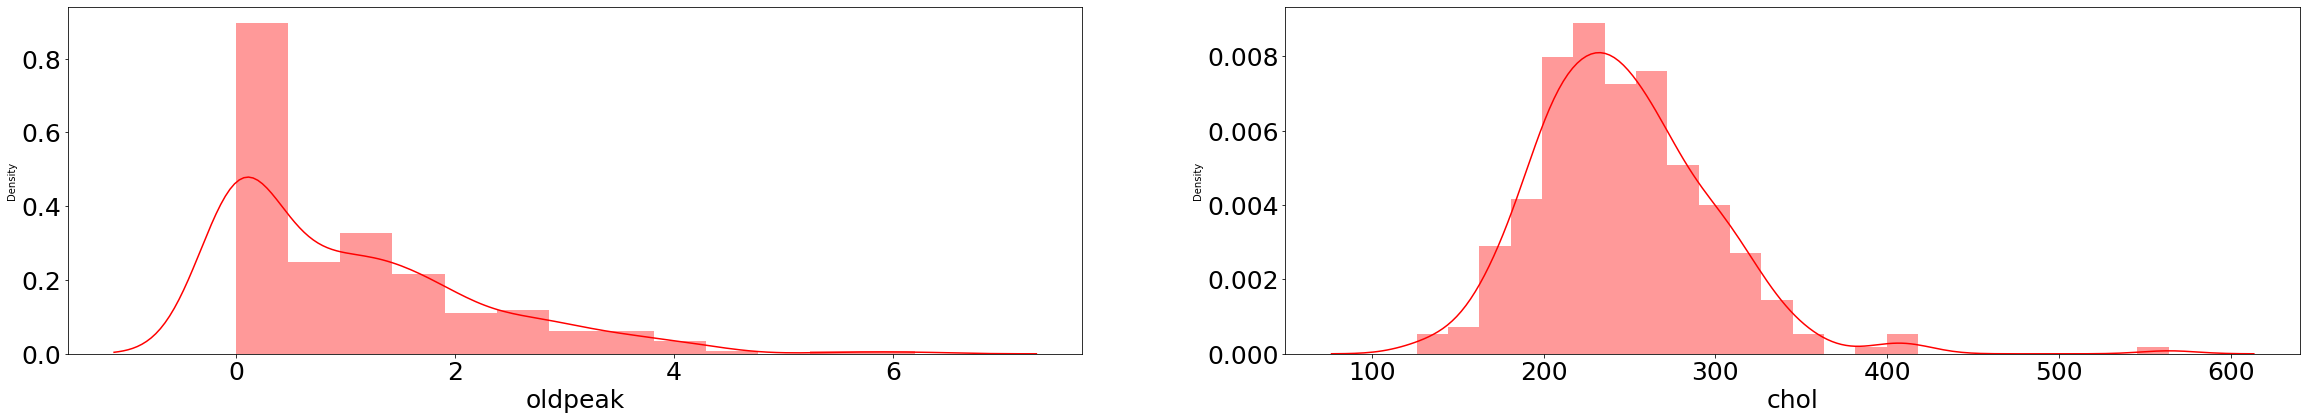

In [21]:
#let find the skewed col and fix them
    
skew_limit=0.75 # limit for skewed col
skew_vals=X[numeric_col].skew()
skew_col=skew_vals[abs(skew_vals)>skew_limit].sort_values(ascending =False)

#graphically represent the skewed col
i=1    
print("Columns names: ",skew_col.index)
print("\n")
print("skewed value:--->>\n",skew_col)
plt.figure(figsize=(40,60))
for col in skew_col.index:
    plt.subplot(8,2,i)
    sns.distplot(X[col],color="r")
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    i=i+1
        

plt.show()

<b> Damn🥵 ! 2 skewed col found , we should fix it !

In [22]:
#fix the skewness using function transformer
ft=FunctionTransformer(func=np.log1p)
skew=['oldpeak',"chol"]
X[skew]=ft.fit_transform(X[skew])

In [23]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,5.455321,1,0,150,0,1.193922,0,0,1
1,37,1,2,130,5.525453,0,1,187,0,1.504077,0,0,2
2,41,0,1,130,5.323010,0,0,172,0,0.875469,2,0,2
3,56,1,1,120,5.468060,0,1,178,0,0.587787,2,0,2
4,57,0,0,120,5.872118,0,1,163,1,0.470004,2,0,2


<b> we mathemetically transform the skewed columns , great !!!

<a id="7.2"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;"> 🐱‍🏍Train test split</p>

In [24]:
#It is a good practise to split the data to avoiding the data leakage 
#train test split  
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train shape: ",x_train.shape)
print("X_test shape: ",x_test.shape)
print()
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)


X_train shape:  (241, 13)
X_test shape:  (61, 13)

Y_train shape:  (241,)
Y_test shape:  (61,)


<a id="7.3"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;"> 🎯Scaling the features</p>

In [25]:
# Using standard scaler
sc=StandardScaler()
m=MinMaxScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

x_train = pd.DataFrame(x_train_scaled, columns = x_train.columns[:])
x_test = pd.DataFrame(x_test_scaled, columns = x_test.columns[:])
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-1.350641,0.731459,0.000000,-0.630711,0.986354,-0.391293,0.890028,0.549139,-0.659184,-1.100985,0.965436,-0.683490,-0.545762
1,1.487426,0.731459,0.966493,2.753363,0.624482,2.555631,-0.991522,0.012071,1.517027,0.787638,-0.684707,-0.683490,1.140502
2,1.378270,0.731459,-0.966493,-0.348705,0.253172,2.555631,0.890028,0.593894,-0.659184,-0.740616,-0.684707,1.350103,1.140502
3,0.068393,-1.367131,0.000000,0.215308,0.175424,-0.391293,-0.991522,0.504383,-0.659184,0.629429,-0.684707,-0.683490,-0.545762
4,1.050801,0.731459,0.966493,0.497314,1.609658,-0.391293,0.890028,0.370116,-0.659184,-1.100985,0.965436,-0.683490,-0.545762


<b>yahoooooo ! we done all the steps ,now our features are ready to fit in the models 😜

<a id="8"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;"> 🤖 Create & Train Model</p>

In [35]:
#this function used to evalute the models with features and terget.
def models_score(models, X_train, X_test, y_train, y_test):    
    
    scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred=model.predict(X_test) 
        scores[name] = model.score(X_test,y_test)
        #printing the model name and accuracy !!!!!
        print("Model name: ",model)
        print("Accuracy :--->>",accuracy_score(y_test,y_pred))
        print()
        print(classification_report(y_test,y_pred))
        print("Confusion matrix:--->>\n",confusion_matrix(y_test,y_pred)) 
        print("\n<<<<------------------------------------------------------------->>>>\n")
           
   
    model_scores = pd.DataFrame(scores, index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score',ascending=False)
    return model_scores

In [36]:
#initialize the models 
models = {"LogisticRegression":LogisticRegression(),
          "SVC":SVC(random_state=42),
          "Ridge":RidgeClassifier(),
          "DecisionTree":DecisionTreeClassifier(),
          "GradiantBoost":GradientBoostingClassifier(),
         "RandomForest":RandomForestClassifier(random_state=42),
         "XgBoost": XGBClassifier(),
         "KNeighborsClassifier":KNeighborsClassifier()}

<a id="9"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">🧮 Models Score</p>

In [37]:
#Calling the function
model_scores = models_score(models, x_train, x_test, y_train, y_test)

Model name:  LogisticRegression()
Accuracy :--->> 0.819672131147541

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Confusion matrix:--->>
 [[24  5]
 [ 6 26]]

<<<<------------------------------------------------------------->>>>

Model name:  SVC(random_state=42)
Accuracy :--->> 0.8524590163934426

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion matrix:--->>
 [[25  4]
 [ 5 27]]

<<<<--------------------------------------------

In [38]:
model_scores

,Score
KNeighborsClassifier,0.901639
RandomForest,0.868852
SVC,0.852459
GradiantBoost,0.852459
XgBoost,0.852459
LogisticRegression,0.819672
Ridge,0.819672
DecisionTree,0.786885


<a id="10"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">📊 Visualize Model Score</p>

In [30]:
model_scores = model_scores.reset_index().rename({"index":"Algorithms"}, axis = 1)

model_scores.style.bar()

,Algorithms,Score
0,KNeighborsClassifier,0.901639
1,RandomForest,0.868852
2,SVC,0.852459
3,GradiantBoost,0.852459
4,XgBoost,0.852459
5,LogisticRegression,0.819672
6,Ridge,0.819672
7,DecisionTree,0.770492


In [31]:
fig = px.bar(data_frame = model_scores,
             x="Algorithms",
             y="Score",
             color="Algorithms", title = "<b>Models Score</b>", template = 'plotly_dark')

fig.update_layout(bargap=0.2)

fig.show()

In [32]:
label = model_scores['Algorithms']
value = model_scores['Score']

fig = go.Figure(data=[go.Pie(labels = label, values = value, rotation = 90)])

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width = 1.5)))

fig.update_layout(title_x=0.5,
                  title_font=dict(size=20),
                  uniformtext_minsize=15)

fig.show()

<a id="11"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">🌈Confusion matrix of top two models</p>

Confusion matrix:------>>>>



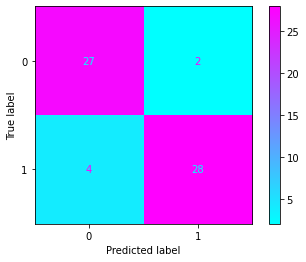

In [33]:
#knn classifier.
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print("Confusion matrix:------>>>>\n")
plot_confusion_matrix(knn,
                      x_test, y_test,
                      cmap="cool",
                      display_labels = ['0', '1'])
plt.grid(False)
plt.show();

Confusion matrix:---------->>>



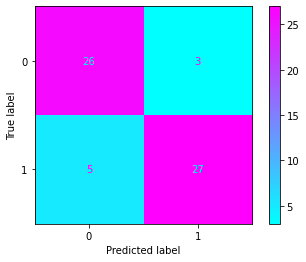

In [34]:
#Random forest classifier.
rf=RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
print("Confusion matrix:---------->>>\n")
plot_confusion_matrix(rf,
                      x_test, y_test,
                      cmap="cool",
                      display_labels = ['0', '1'])
plt.grid(False)
plt.show();

<a id=""></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">🌈Thank you 🎃 Happy kaggling👅</p>